# Comparing birth rates

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
# Get utils.py

import os

if not os.path.exists('utils.py'):
    !wget https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py

Here's an exercise that was in a draft of *Think Bayes*, but I ended up cutting it.


**Exercise:**  Two doctors fresh out of medical school are arguing about whose hospital delivers more babies.  The first doctor says, "I've been at Hospital A for one week, and already we've had a day when we delivered 19 babies."

The second doctor says, "I've been at Hospital B for two weeks, and already there's been a 20-baby day."

Which hospital do you think delivers more babies on average?  You can assume that the number of babies born in a day is well modeled by a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) with parameter $\lambda$, which is the Greek letter pronounced "lambda".

The following function computes the PMF of a Poisson distribution with parameter `lam` over a range of integers, `qs`:

In [3]:
from empiricaldist import Pmf
from scipy.stats import poisson

def make_poisson_pmf(lam, qs):
    """Make a PMF of a Poisson distribution.
    
    lam: event rate
    qs: sequence of values for `k`
    
    returns: Pmf
    """
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

For example, if the actual value of $\lambda$ is 8, we can compute the distribution of babies born in a single day like this:

In [4]:
import numpy as np

lam = 8
qs = np.arange(24)
pmf = make_poisson_pmf(lam, qs)

And here's what it looks like.

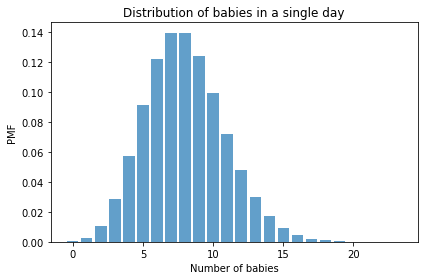

In [5]:
from utils import decorate

pmf.bar(alpha=0.7)
decorate(xlabel='Number of babies', 
         ylabel='PMF',
         title='Distribution of babies in a single day')

The mean of this distribution is the parameter, $\lambda$.

In [6]:
pmf.mean()

7.999938721091352

And here's what the distributions look like for the maximum number of babies after one week or two weeks.

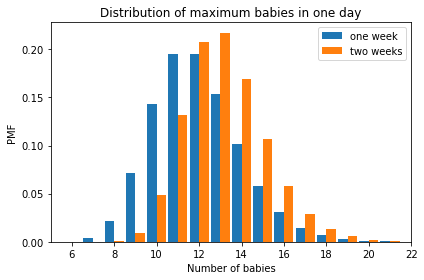

In [7]:
pmf_max1 = pmf.max_dist(7)
pmf_max1.bar(label='one week', align='edge', width=-0.45)

pmf_max2 = pmf.max_dist(2 * 7)
pmf_max2.bar(label='two weeks', align='edge', width=0.45)

decorate(xlabel='Number of babies',
         xlim=[5, 22],
         ylabel='PMF',
         title='Distribution of maximum babies in one day')

Now you finish it off from there.

In [8]:
# Solution

# Here's a prior distribution for the values of lamdba

hypos = np.linspace(0, 25, 101)
prior = Pmf(1, hypos)

In [9]:
# Solution

# Here's the likelihood of the data for each hypothetical
# value of lambda, for the doctor who reported the maximum
# number of babies in one week

days = 1 * 7      # one week
data = 19         # maximum of 19 babies

likelihood1 = [make_poisson_pmf(hypo, qs).max_dist(days)(data)
               for hypo in hypos]

In [10]:
# Solution

# And here's the first posterior distribution

posterior1 = prior * likelihood1
posterior1.normalize()

4.201483589848796

In [11]:
# Solution

# Here's the likelihood for the doctor who reported the
# maximum number of babies in two weeks.

days = 2 * 7
data = 20

likelihood2 = [make_poisson_pmf(hypo, qs).max_dist(days)(data)
               for hypo in hypos]

In [12]:
# Solution

# And here's the second posterior

posterior2 = prior * likelihood2
posterior2.normalize()

4.259983296308155

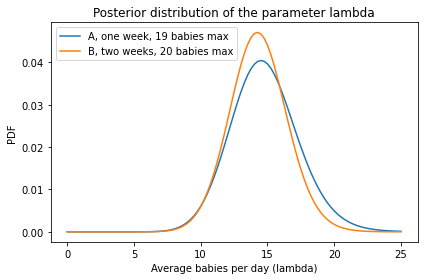

In [13]:
# Solution

# And here's what the two posterior distributions look like

posterior1.plot(label='A, one week, 19 babies max')
posterior2.plot(label='B, two weeks, 20 babies max')

decorate(xlabel='Average babies per day (lambda)', 
         ylabel='PDF',
         title='Posterior distribution of the parameter lambda')

In [14]:
# Solution

# The posterior mean is a little higher for hospital a,
# based on one week of data and a slightly lower maximum

posterior1.mean(), posterior2.mean()

(14.794330239819137, 14.327038448986379)

In [22]:
# And here's the probability that the birth rate is higher in Hospital A

posterior1.gt_dist(posterior2) + posterior1.eq_dist(posterior2) / 2

0.5511810168369614

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)